In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$ \frac{d V_{\mathrm{out}}}{d t}=\frac{1}{R C}\left(V_{\mathrm{in}}-V_{\mathrm{out}}\right) $$

In [7]:
def rk4(f, a, b, N, x0, params = []):
    h = (b - a) / N
    ts = np.linspace(a, b, N)
    x = np.zeros(N, float)
    x[0] = x0
    for i, t in enumerate(ts[1:]):
        x_t = x[i-1]
        k1 = h * f(x_t, t, *params)
        k2 = h * f(x_t + .5 * k1, t + .5 * h, *params)
        k3 = h * f(x_t + .5 * k2, t + .5 * h, *params)
        k4 = h * f(x_t + k3, t + h, *params)
        x[i] = x_t + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return ts, x

In [8]:
def V_in(t):
    return (-1)**np.floor(2*t)

def f(x, t, V_in, RC):
    return (V_in(t) - x) / RC

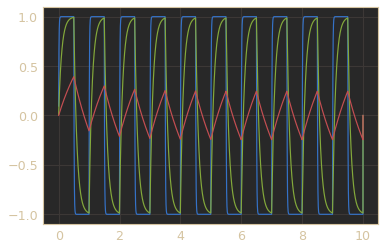

In [10]:
RCs = [.01, .1, 1]
for RC in RCs:
    t,x = rk4(f, 0, 10, 10000, 0, [V_in, RC])
    plt.plot(t, x)